# MVP Tester

In this notebook we will import scripts which contain work done on other notebooks (including the trained RNN). Our goal here is to output our desired "MVP Result", which will be an image with a logo, and a generated tagline.

## 0) Import Scripts & Dependencies

In [16]:
# Importing our scripts
import text_script as txtscript
import image_script as imscript

# Importing Libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageDraw, ImageFont
import urllib.request
import requests
import random
import json

Testing our **text_script**

In [9]:
txtscript.evaluate('Life', 10)

'LifeW THE DAY '

Now testing our ***image_script***

https://pixabay.com/api/?key=9594603-1ab4b7442c4491ab852ebd1ee&q=happy
https://pixabay.com/api/?key=9594603-1ab4b7442c4491ab852ebd1ee&q=happy&category=
https://pixabay.com/api/?key=9594603-1ab4b7442c4491ab852ebd1ee&q=happy&category=&image_type=all


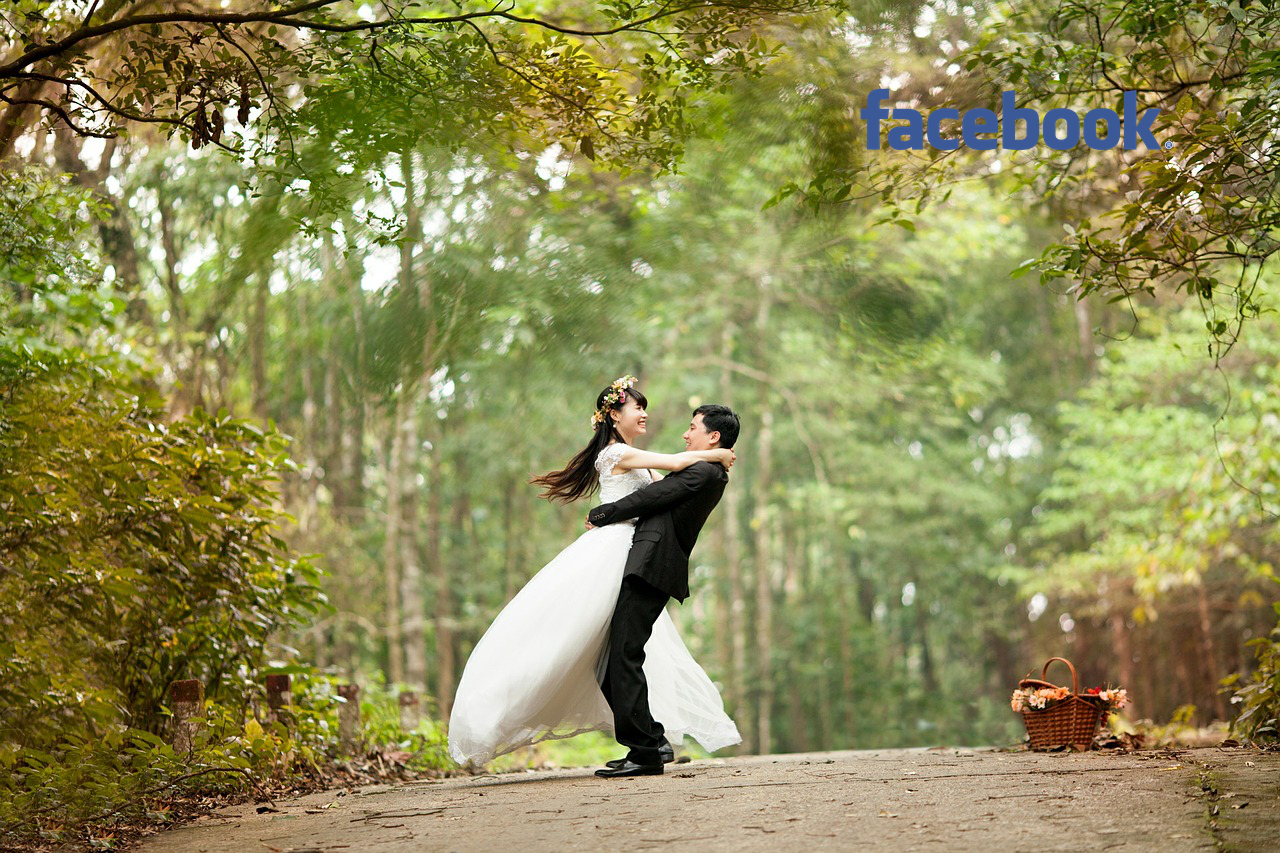

In [7]:
imscript.generate_image('happy')

Looks great, its working fine!

## 1) Drawing Text w/ PIL

Our first step will be to generate an image file of the text we generate. This can be done with PIL. We will need to write a function for this

In [72]:
# First attempt
def draw_text(text, size, fill=None):
    font = ImageFont.truetype(
        '~/Library/Fonts/Helvetica', size
    )
    size = font.getsize(text) # Returns the width and height of the given text, as a 2-tuple.
    im = Image.new('RGBA', size, (0, 0, 0, 0)) # Create a blank image with the given size
    draw = ImageDraw.Draw(im)
    draw.text((0, 0), text, font=font, fill=fill) #Draw text
    return im
 
img = draw_text('Apple', 30, (82, 124, 178))
img

Okay, we now have a (basic) way of writing text and storing it as an image

## 2) Create Image of Slogan

We now take it a step further, but providing draw text with our evaluation. To keep it clean, we will write a new function that call upon both ```draw_text``` and ```evaluate```

In [52]:
def draw_slogan(num_candidates=5, predict_len=20, temperature=0.8, size=30, fill=None):
    final_slogans = []
    slogans = txtscript.get_candidates(num_candidates, predict_len, temperature)
    for slogan in slogans:
        final_slogans.append(draw_text(slogan, size, fill))
    return final_slogans

In [53]:
draw_slogan('LIVE', fill=(82,124, 178))

KeyboardInterrupt: 

Pretty simple implementation. Later we will want to replace ```evaluate``` for ```get_candidates```, so we have multiple options

## 3) Combining Slogan Image and Main Image

Now for what we have been waiting for (sort of). Lets put both images together! This is still going to look really shitty, but the most raw example of our MVP Result will be created :)

In [57]:
def content_generator(description, num_candidates=5, predict_len=20, temperature=0.8, size=30, fill=None):
    main_image = imscript.generate_image(description)
    final_slogans = draw_slogan(num_candidates, predict_len, temperature, size, fill)
    # For now, randomly picking 1 final slogan
    slogan = random.choice(final_slogans)
    # Setting up center of main image for pasting
    image_w, image_h = main_image.size
    slogan_w, slogan_h = slogan.size
    center = ((image_w // 2) - (slogan_w // 2), (image_h // 2) - (slogan_h // 2))
    # Pasting
    main_image.paste(slogan, center, slogan)
    return main_image

Okay... lets try this thing out now...

https://pixabay.com/api/?key=9594603-1ab4b7442c4491ab852ebd1ee&q=Happy
https://pixabay.com/api/?key=9594603-1ab4b7442c4491ab852ebd1ee&q=Happy&category=
https://pixabay.com/api/?key=9594603-1ab4b7442c4491ab852ebd1ee&q=Happy&category=&image_type=all
{'neg': 0.2398946592080643, 'neutral': 0.4237551413295611, 'pos': 0.7601053407919357}
number of sentiment evaluations done: 4


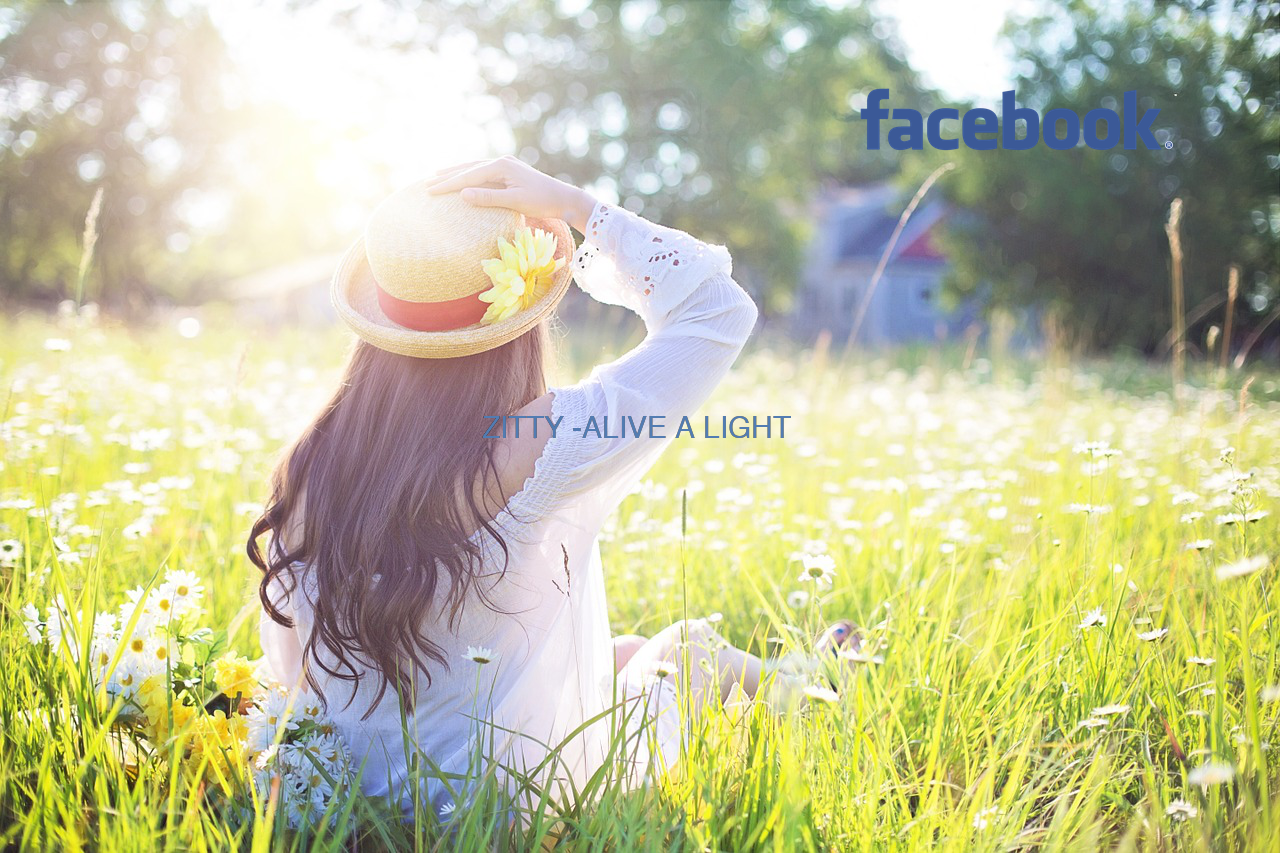

In [60]:
content_generator("Happy", num_candidates=1, fill=(82,124, 178))

## CAPITAL!

The Aplha-aplha version is now complete... lol

Regarding next steps:

- Improve RNN Performance 
- ```generate_image``` should provide a list of images with logos in different spots
- ```draw_text``` should be able to take different fonts (depending on availability), and color based on logo.
- ```generate_content``` should return a list of final results, with varying logo positions, taglines, and images

By achieving these 4 objectives, the product criteria for the MVP will be complete. **The next step will be developing a web application for its use.**